<a href="https://colab.research.google.com/github/yeonchaepark/LA2/blob/main/ex03_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Part2. PCA  
###0)Import libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler

###1)Download Iris dataset  


In [4]:
#iris 데이터의 위치 URL
url="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# Pandas DataFrame으로 읽어들이기
df=pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

nrow, ncol=df.shape
print("Iris data set: ", nrow, "records with", ncol,"attributes\n")
print("First 5 records in iris data\n", df.head(5))
features=['sepal length','sepal width','petal length','petal width']
x=df.loc[:, features].values #데이터의 속성값
y=df.loc[:,['target']].values #데이터의 부류
x=StandardScaler().fit_transform(x) #평균0, 분산 1인 데이터로 변환

Iris data set:  150 records with 5 attributes

First 5 records in iris data
    sepal length  sepal width  petal length  petal width       target
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


###2)PCA


In [8]:
pca=PCA(n_components=2) #PCA를 적용하여 2개의 주성분만 추출
principalComponents=pca.fit_transform(x)
#주성분 축 2개를 이용하여 2차원 데이터로 변환
print("\nFirst principal axis:",pca.components_[0])
print("Seconds principal axis:",pca.components_[1])

principalDf=pd.DataFrame(data=principalComponents,
                         columns=['principal component 1','principal component 2'])
finalDf=pd.concat([principalDf, df[['target']]],axis=1)

print("\nFirst 5 Transformed record\n", finalDf.head(5))


First principal axis: [ 0.52237162 -0.26335492  0.58125401  0.56561105]
Seconds principal axis: [0.37231836 0.92555649 0.02109478 0.06541577]

First 5 Transformed record
    principal component 1  principal component 2       target
0              -2.264542               0.505704  Iris-setosa
1              -2.086426              -0.655405  Iris-setosa
2              -2.367950              -0.318477  Iris-setosa
3              -2.304197              -0.575368  Iris-setosa
4              -2.388777               0.674767  Iris-setosa


###3)Plot Iris dataset on the 2 components

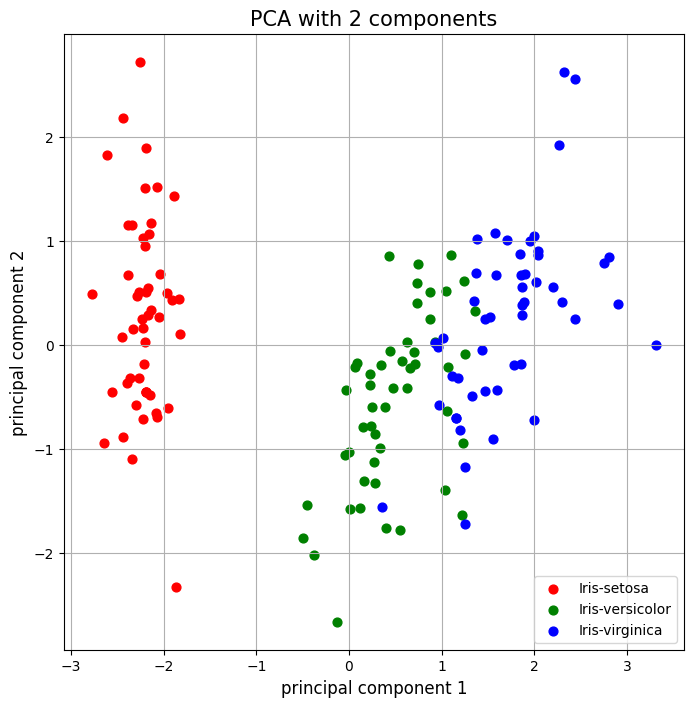

In [10]:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_xlabel('principal component 1', fontsize=12)
ax.set_ylabel('principal component 2', fontsize=12)
ax.set_title('PCA with 2 components', fontsize=15)

targets=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'] #Iris 데이터의 부류 이름
colors=['r','g','b'] # 부류별로 지정된 색상
for target,color in zip(targets,colors):
  #target에 해당하는 인덱스 가져오기
  indicesToKeep=finalDf['target']==target
  ax.scatter(finalDf.loc[indicesToKeep,'principal component 1']
             ,finalDf.loc[indicesToKeep,'principal component 2'],c=color,s=40)
  ax.legend(targets)
  ax.grid()
  fig.show()